# 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

**Это временные ряды**

а) зависимость цены на недвижимость в еонкретном регионе от времени,

д) координаты автобуса при движении по маршруту(ЕСЛИ КООРДИНАТЫ ПРЕДСТАВЛЕНЫ ПОСЛЕДОВАТЕЛЬНО ЧЕРЕЗ ПРОМЕЖУТКИ ВРЕМЕНИ),

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

**Это не временные ряды**

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

# 2. вариант 1) Прочитайте DUQ_hourly.csv 
**и проверьте качество и порядок разметки этой выборки 
с информацией о потреблении энергии в одном из районов Восточной Электросети США. 
Сделайте описание особенностей этой выборки.**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os

import pandas_profiling

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
DUQ = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [0]:
DUQ.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [0]:
DUQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [0]:
DUQ.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


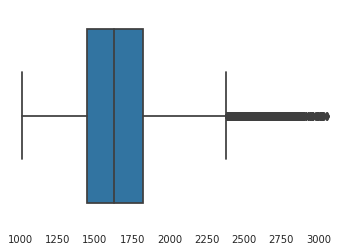

In [0]:
sns.boxplot(DUQ.values)

In [0]:
# проверим пропуски
DUQ['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

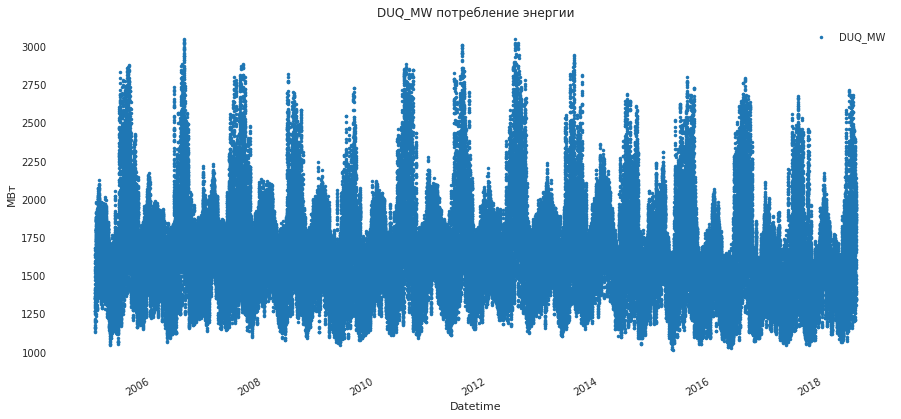

In [0]:
#Посмотрим ряд на графике
DUQ.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

Выбросов и сомнительных эпизодов не видно

In [0]:
pandas_profiling.ProfileReport(DUQ)

# 2.1 Выборка ровная. Ни выбросов, ни пропусков не обнаружено. Каких-либо особенностей также не обнаружено

# 3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . 
Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, 
месячных и годовых группах для Brent. 
(одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [0]:
BRENT = pd.read_excel('oil_brent_2010_2019.xlsx', index_col=[0], parse_dates=[0])

In [13]:
BRENT.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [14]:
BRENT.dtypes

Значение    float64
dtype: object

In [15]:
BRENT.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


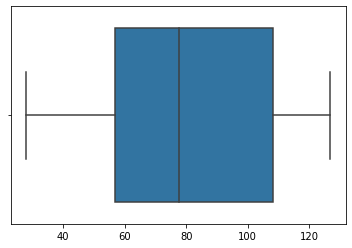

In [16]:
sns.boxplot(BRENT.values)

Text(0.5, 0, 't')

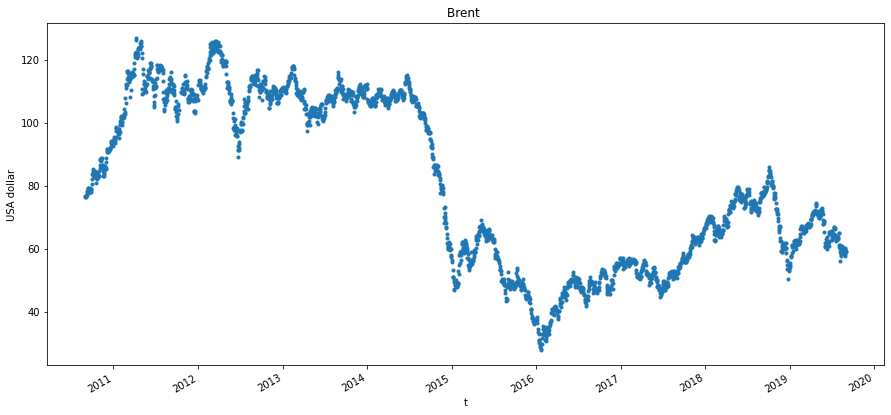

In [17]:
_ = BRENT['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [18]:
BRENT.iloc[-1]

Значение    76.37
Name: 2010-09-01 00:00:00, dtype: float64

Text(0, 0.5, 'Деньги')

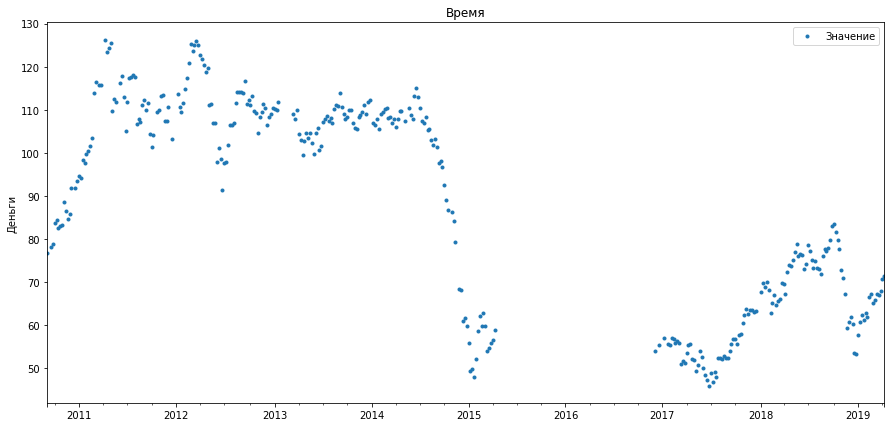

In [30]:
week_data_time = pd.date_range('9/1/2010', periods = 450, freq="W")
week_df = pd.DataFrame(index = week_data_time, data = BRENT['Значение'])

#Посмотрим ряд на графике
week_df.plot( style = '.', figsize = ( 15, 7 ), title = 'Время' )
plt.ylabel ( 'Деньги' )

Text(0, 0.5, 'Деньги')

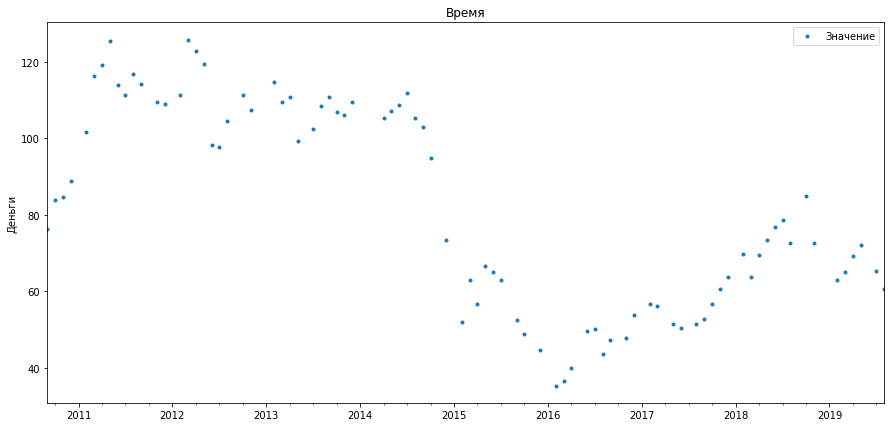

In [31]:
month_data_time = pd.date_range('9/1/2019', periods = 108, freq="MS")
month_df = pd.DataFrame(index = month_data_time, data = BRENT['Значение'])#Посмотрим ряд на графике
month_df.plot( style = '.', figsize = ( 15, 7 ), title = 'Время' )
plt.ylabel ( 'Деньги' )

# 4. Сделайте вывод о том, как изменилось поведение цены
на недельных и месячных графиках по сравнению с дневными.

**Изменилось не принципиально. Чтобы пролучить другую картинку, нужно взять почасовые метки и уменьшить масштаб**

Text(0, 0.5, 'Деньги')

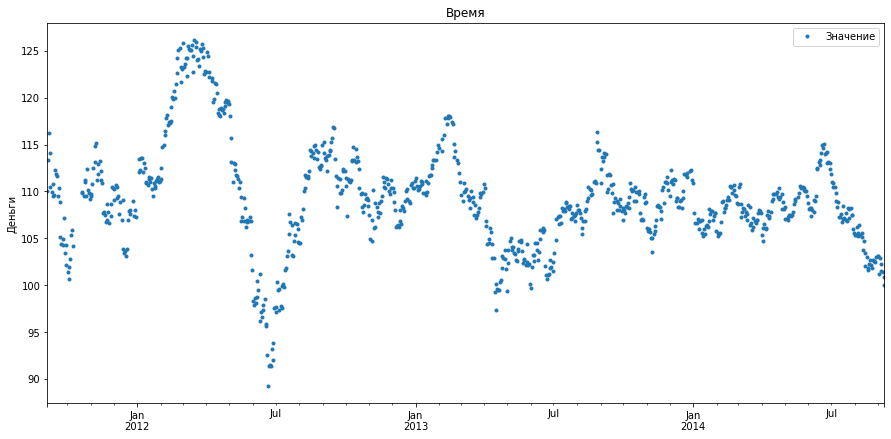

In [37]:
hour_data_time = pd.date_range('9/5/2011', '9/9/2014', freq="H")
hour_df = pd.DataFrame(index = hour_data_time, data = BRENT['Значение'])#Посмотрим ряд на графике
hour_df.plot( style = '.', figsize = ( 15, 7 ), title = 'Время' )
plt.ylabel ( 'Деньги' )

**А лучше смотреть здесь**: https://ru.tradingview.com/chart/UKOIL/ivWKNJs8-brent-po-200-k-2025/

Но мне так кажется, что предсказательного смысла в этом не слишком много. Не с теми инструментами, что у нас в руках

Имей мы в распоряжении МЕГА-парсер навроде поисковика
+ развитые инструменты NLP - такое можно пробовать )
